# Singular Value Decomposition

### Γιώργος Λεβαντής Α.Μ 2744
### Παναγιώτης Τσιάβος Α.Μ. 2396

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("darkgrid")
%matplotlib inline


<b>Κατέβασμα 20Newsgroups με topics 'talk.politics.mideast', και 'rec.sport.baseball' </b>

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
categories = ['talk.politics.mideast', 'rec.sport.baseball']

newsgroups_train = fetch_20newsgroups(subset='train', 
                               remove=('headers', 'footers', 'quotes'),
                               categories=categories)

print ("Target(true) values: ",newsgroups_train.target)
print ("length: ",len(newsgroups_train.target))
print("Topic names:",newsgroups_train.target_names)

Target(true) values:  [0 0 1 ... 0 1 0]
length:  1161
Topic names: ['rec.sport.baseball', 'talk.politics.mideast']


Target values όπου:
- 0 -> 'rec.sport.baseball'
- 1 -> 'talk.politics.mideast'


Διαβάζοντας το πρώτο κείμενο μπορούμε να συμπεράνουμε ότι ανήκει στην κατηγοριά 'rec.sport.baseball' 

In [3]:
# Looking to determine for ourselves in which topic it belongs. Ans: baseball (based on text)
print("\n".join(newsgroups_train.data[:1]))
# newsgroups_train.data[:1]


     BO JACKSON 1963          
  1988 KCR    437  106  16   4  23   28   29   7  .253   67  .243  .288  .455
  1989 KCR    517  134  19   5  33   41   27  10  .274   92  .259  .314  .507
  1990 KCR    405  110  17   1  27   44   16   9  .286   77  .272  .343  .519
  1991 CWS     71   16   3   0   3   12    0   1  .240   10  .225  .337  .394
    MAJ      1430  366  55  10  86  125   72  27  .270  246  .256  .316  .489
    MAJ       598  153  23   4  36   52   30  11

This is what Jackson looked like in 88-91, with everything converted
to a neutral park, on the basis of run production. His equivalent
average started at .253 in 88, was up to .274 in 89 and 286 in 90. So
let us say he had established, in his last two seasons, a .280 level
of play.

That is good. Very good, in fact. But it probably doesn't make the top
ten in the league. The 10th best EQA in the AL in 1992 was Dave
Winfield's .296; Thomas was first at .350. First in the NL was Bonds,
an incroyable .378; tenth was Bip Rober

In [4]:
# Baseball is indeed the topic
np.array(newsgroups_train.target_names)[newsgroups_train.target[0]]

'rec.sport.baseball'

In [5]:
#Every indice maps to a topic
print(newsgroups_train.target[:])
np.array(newsgroups_train.target_names)[newsgroups_train.target[:]]

[0 0 1 ... 0 1 0]


array(['rec.sport.baseball', 'rec.sport.baseball',
       'talk.politics.mideast', ..., 'rec.sport.baseball',
       'talk.politics.mideast', 'rec.sport.baseball'], dtype='<U21')

## TfidfVectorizer
Με την χρήση του TfidfVectorizer μπορούμε να μετατρέψουμε μια συλλογή ακατέργαστων εγγράφων σε ένα matrix των χαρακτηριστικών TF-IDF.  
Κάθε στήλη στήλη αντιστοιχεί σε μια λέξη και κάθε κελή αντικατοπτρίζει τη σημασία μιας λέξης σε ένα έγγραφο(γραμμή)

In [6]:
vectorizer = TfidfVectorizer(stop_words='english',min_df=1)
print("Vectorizing...")
M = vectorizer.fit_transform(newsgroups_train.data).todense()
M.shape

Vectorizing...


(1161, 17812)

Παρακάτω βλέπουμε μερικές λέξης αυτού του πίνακα

In [7]:
vocab = np.array(vectorizer.get_feature_names())
print(vocab.shape)
vocab[3000:3050]

(17812,)


array(['branch', 'branches', 'brand', 'brandeis', 'branding', 'brandt',
       'brandy', 'branson', 'brantley', 'brass', 'brats', 'bratt',
       'brave', 'bravery', 'braves', 'brazen', 'brazenly', 'brazil',
       'brazilian', 'breach', 'breaches', 'bread', 'breadth', 'break',
       'breakdown', 'breaking', 'breaks', 'breakstone', 'breakup',
       'bream', 'breast', 'breasts', 'breath', 'breathe', 'breathing',
       'breech', 'breed', 'breeding', 'bregel', 'brein', 'brendan',
       'brenly', 'bresheeth', 'bretheren', 'brethren', 'brethrens',
       'brett', 'brevity', 'brew', 'brewer'], dtype='<U79')

Αφαιρούμε τα κείμενα με μηδενικά features απο τον M και τα αντίστοιχα targets του newsgroups (για K-means)

In [8]:
drop_indices = np.where(~M.any(axis=1))[0]
drop_indices

array([  14,   60,   76,  117,  131,  147,  165,  180,  244,  255,  274,
        322,  355,  422,  441,  449,  483,  492,  493,  516,  520,  597,
        640,  722,  758,  763,  814,  836,  904,  920,  930,  932,  935,
        975, 1001, 1006, 1007, 1010, 1023, 1073, 1111, 1143], dtype=int64)

In [9]:
M = np.delete(M,drop_indices,0)
newsgroups_train_target = np.delete(newsgroups_train.target,drop_indices)

In [10]:
print(M.shape,newsgroups_train_target.shape)

(1119, 17812) (1119,)


## SVD decomposition

### $$M = U\Sigma V^{T}$$

𝑼∶ orthogonal matrix containing the top k left singular vectors of M.  
 
𝜮: diagonal matrix containing the top k singular values of M  

𝑽: orthogonal matrix containing the top k right singular vectors of M. 

In [11]:
U, s, V = np.linalg.svd(M.data,full_matrices = False) 
print (U.shape, s.shape, V.shape)

(1119, 1119) (1119,) (1119, 17812)


Text(0.5, 0, 'number of eigenvalues')

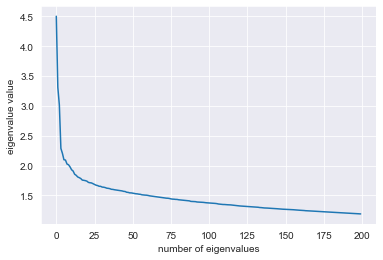

In [12]:
plt.plot(s[:200])
plt.ylabel('eigenvalue value')
plt.xlabel('number of eigenvalues')

In [13]:
# Actual topics
np.array(newsgroups_train.target_names)

array(['rec.sport.baseball', 'talk.politics.mideast'], dtype='<U21')

Υπολογισμός του μέσο tf-idf score της κάθε λέξης (c)

In [14]:
# TFIDF mean of every topic
c = M.mean(0)
print(c.shape)
print(V[0].shape)

(1, 17812)
(17812,)


In [15]:
# Reshaping for pearson score
c = np.array(c).reshape(-1)
c.shape

(17812,)

In [16]:
s[:2]

array([4.50255352, 3.31188322])

Υπολογίζοντας τον pearson μεταξύ του μέσο tf-idf score της κάθε λέξης και το πρώτο δεξί singular vector παρατηρούμε οτι υπάρχει ενα negative linear correlation μεταξύ αυτο των δύο (το οποίο φαίνεται και στο scatter)

Όσο αφορά για τα σημεία:  
Ο SVD μας δίνει τον καλύτερο άξονα για την προβολή πάνω σε αυτών V (για ελάχιστο RMSE) και διαδίδονται (spread) με βάση τον S.

Παρατηρώντας το scatter βλέπουμε οτι οι τιμές του πρώτου αριστερού singular vector ειναι κυρίως αρνητικές.

Pearson:  -0.9714257117298646


Text(0.5, 0, 'Mean TF-IDF')

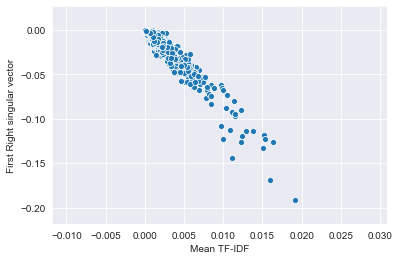

In [17]:
import scipy.stats as stats

print("Pearson: ",stats.pearsonr(c,V[0])[0])
# plt.scatter(c, V[0])
ax1 = sns.scatterplot(c,V[0])
ax1.set_ylabel('First Right singular vector')
ax1.set_xlabel('Mean TF-IDF')

In [18]:
vocab.shape

(17812,)

In [19]:
# v0 = V[0].argsort()[::-1]
# v1 = V[1].argsort()[::-1]

In [20]:
# vocab[v0][:30]
# vocab[v1][:20]

In [21]:
# Coordinates of the points in the projection axis
projection_of_docs = np.dot(U,np.diag(s))

In [22]:
projection_of_docs[:10,:2]

array([[-0.15585753,  0.15163958],
       [-0.0398113 ,  0.02354345],
       [-0.07555211, -0.02898595],
       [-0.03909331,  0.04135849],
       [-0.06743959,  0.03981833],
       [-0.11192582,  0.11937912],
       [-0.23230981, -0.08190717],
       [-0.06590263,  0.04385321],
       [-0.10067448, -0.00072695],
       [-0.13016442, -0.07718513]])

In [23]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:10]]

array(['rec.sport.baseball', 'rec.sport.baseball',
       'talk.politics.mideast', 'rec.sport.baseball',
       'rec.sport.baseball', 'rec.sport.baseball',
       'talk.politics.mideast', 'rec.sport.baseball',
       'talk.politics.mideast', 'talk.politics.mideast'], dtype='<U21')

Κοιτάζοντας τα παρακάτω scatter παρατηρούμε οτι οι τιμές του δεύτερου αριστερού singular vector ειναι κυρίως θετικές και έτσι ξεχορίζουν απο τις τιμές του πρώτου αριστερού singular vector.

Με άλλα λογια τα δύο πρώτα αριστερού singular vector αντιστοιχούν (το καθένα) σε ένα concept τα οποία διαφέρουν μεταξύ τους  
Στο τελευταίο scatter βλέπουμε οτι όντως υπάρχει ενας διαχώρισμος με βάση τα topics

Text(0.5, 1.0, 'First two left singular vectors')

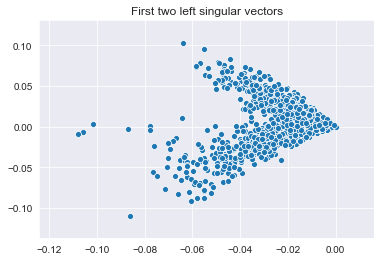

In [24]:
# plt.figure(figsize=(13,7))

ax = sns.scatterplot(U[:,0], U[:,1])
ax.set_title("First two left singular vectors")

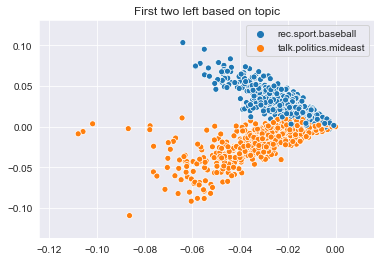

In [25]:
ax = sns.scatterplot(U[:,0],U[:,1], hue=newsgroups_train_target)
ax.set_title("First two left based on topic")
L=ax.get_legend()
L.get_texts()[0].set_text('rec.sport.baseball')
L.get_texts()[1].set_text('talk.politics.mideast')

## K-means

Εφαρμόζωντας των k-means στον πίνακα M με διάσταση 1161x17812, και αντίστοιχα στα δύο πρώτα αριστερά
singular vectors (αυτά που αντιστοιχούν στα δύο μεγαλύτερα singular values ,δηλαδή στα topics)  με διάσταση (1161, 2) τα αποτελέσματα των k-means είναι σχεδόν ίδια (λίγο καλύτερα στο δεύτερο).  

Η μεγάλη διαφορά είναι στον χρόνο υλοποίησης.
- Για τον πίνακα Μ: ~14s
- Για τα U: ~47 ms  

μιας και ο αλγόριθμος K-means έχει πολυπλοκότητα χρόνου Ο(n^2) (K-means++ O(nk) οπου n ο αριθμός των cluster)

In [26]:
import sklearn.cluster as sk_cluster
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as metrics

In [27]:
M.shape

(1119, 17812)

In [28]:
U[:,:2].shape

(1119, 2)

<b>Clusterer and mapping functions</b>

In [29]:
def cluster_class_mapping(kmeans_labels,true_labels):
    C= metrics.confusion_matrix(kmeans_labels,true_labels)
    mapping = list(np.argmax(C,axis=1)) #for each row (cluster) find the best class in the confusion matrix
    mapped_kmeans_labels = [mapping[l] for l in kmeans_labels]
    C2= metrics.confusion_matrix(mapped_kmeans_labels,true_labels)
    return mapped_kmeans_labels,C2

In [30]:
def clusterer(data):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=2, n_init=10)
    kmeans.fit_predict(data)
#     centroids = kmeans.cluster_centers_
#     kmeans_labels = kmeans.labels_
#     error = kmeans.inertia_
    return kmeans

<b>K-means(++) για τον πίνακα Μ με χρόνο</b>

In [31]:
%%time

# Kmeans for M
clusterer_M = clusterer(M)

Wall time: 15.4 s


Πίνακας σύγχυσης, classifcation report για τον Μ.  


Το classifcation report παρουσιάζει μια αναπαράσταση των κύριων μετρήσεων ταξινόμησης (classification metrics) ανά cluster.

In [32]:
mapped_kmeans_labels_M, C_M = cluster_class_mapping(clusterer_M.labels_, newsgroups_train_target)
print(C_M)
print(classification_report(newsgroups_train_target,mapped_kmeans_labels_M))

[[572 233]
 [  0 314]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       572
           1       1.00      0.57      0.73       547

    accuracy                           0.79      1119
   macro avg       0.86      0.79      0.78      1119
weighted avg       0.85      0.79      0.78      1119



<b>K-means(++) για τον πίνακα U[:,:2] με χρόνο</b>

In [33]:
%%time

# Kmeans for U's
clusterer_U = clusterer(U[:,:2])

Wall time: 40 ms


In [34]:
mapped_kmeans_labels_U, C_U = cluster_class_mapping(clusterer_U.labels_, newsgroups_train_target)
print(C_U)
print(classification_report(newsgroups_train_target,mapped_kmeans_labels_U))

[[572 194]
 [  0 353]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       572
           1       1.00      0.65      0.78       547

    accuracy                           0.83      1119
   macro avg       0.87      0.82      0.82      1119
weighted avg       0.87      0.83      0.82      1119



Με βάση τα classification_report παρατηρούμε μια ελαφρός καλύτερη ακρίβεια στο 2ο (για το cluster 0) , το οποίο αντίστοιχα βελτιώνει το recall στο cluster 1

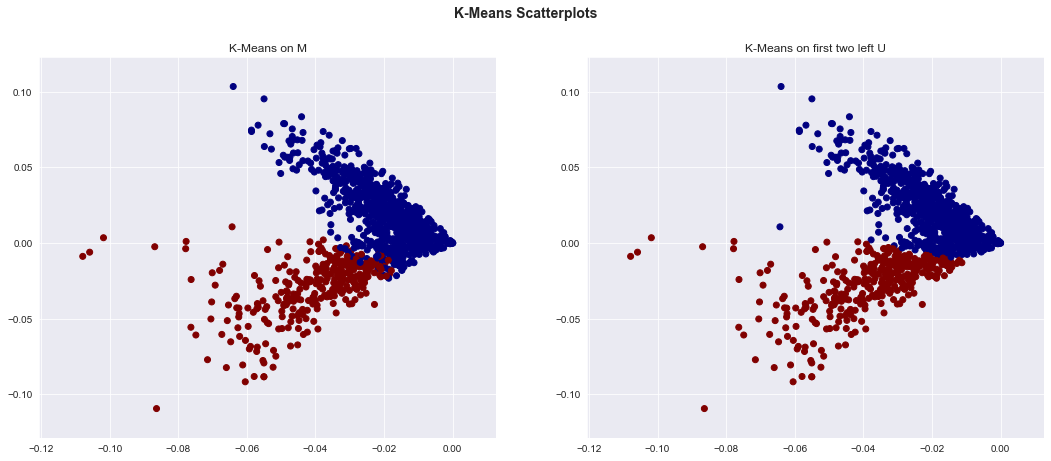

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

plt.suptitle(("K-Means Scatterplots"),fontsize=14, fontweight='bold')

ax1.set_title("K-Means on M")
ax1.scatter(U[:,0], U[:,1], c=mapped_kmeans_labels_M, cmap='jet')

ax2.set_title("K-Means on first two left U")
ax2.scatter(U[:,0], U[:,1], c=mapped_kmeans_labels_U, cmap='jet')